Neuromorphic engineering I

## Lab 3: Transistor superthreshold saturation current and drain characteristics


**Reminder: Did you `git pull` the exercises before starting this notebook?**

Group number (if given one by TA):

Team member 1:

Team member 2:

Date:

CoACH Chip number:

-------------------------------------------------------------------------------------------------------------------

The objective of this lab is to understand _super-threshold_ ( also called _above-threshold_ or _strong inversion_ ) transistor operation and to understand transistor drain conductance characteristics, particularly _channel length modulation_.

The specific experimental **objectives of this lab**  are as follows: 
1. To characterize drain current of a transistor as a function of gate voltage in superthreshold operation in the ohmic (triode) and saturation regions.
2. To characterize the drain saturation properties in super-threshold.
3. To characterize drain conductance (the Early effect) and how it scales with transistor length (may not be possible this year) and saturation drain current.

An intuitive and quantitative understanding of all these effects, along with the subthreshold behavior (last week), is useful for the design of effective circuits, especially analog design of high performance amplifiers.

# 1 Terminology

- above-threshold = super-threshold =  strong inversion
- sub-threshold = below-threshold = weak inversion
- triode region = ohmic region = linear drain conductance behavior with small drain-source voltage
- saturation = large $V_{\rm ds}$ 
- $U_{\rm T} \equiv kT/q$ = thermal voltage = 25mV at room temperature
- $V_{\rm T}$ = threshold voltage = 0.4V to 0.8V depending on process
- overdrive = $V_{\rm ov} \equiv V_{\rm g}-V_{\rm T}$


# 2 Useful Quantities

The following is a list of the physical parameters and constants we
will be referring to in this lab, along with their values when
appropriate. The units that are most natural for these quantities are
also included; these units are not self--consistent, so make sure you
convert the units when appropriate.


* $\epsilon_0$ :  Permittivity of vacuum = $8.86\times10^{-12} \rm{ F/m}$ 
* $\epsilon_{Si}$ : Relative permittivity of ${\rm Si}$ = $11.7\epsilon_0$ 
* $\epsilon_{ox}$ : Relative permittivity of ${\rm SiO_2}$ = $3.9\epsilon_0$ 
* $\mu_n$ : electron surface mobility, ${\rm cm^2/V/s}$ 
* $\mu_p$ : hole surface mobility, ${\rm cm^2/V/s}$
* $C_{ox}$ : gate capacitance across the oxide per unit area,
	${\rm fF/\mu m^{2}}$ 
* $C_{dep}$ : capacitance of depletion region per unit area,
	${\rm fF/\mu m^{2}}$ 
* $t_{ox}$ : gate oxide thickness $\approx$
	3.8 nm for the class chip in 180 nm techology.
* $V_T$ : threshold voltage, V ($V_{T0}$ is $V_T$ when $V_s$ = 0).
* $W$ : electrical width of transistor channel, $\approx 4 \mu {\rm m}$ for both devices in this lab 
* $L$ : electrical length of transistor channel, $\approx 4 \mu {\rm m}$ for both devices in this lab
* $\beta$ $\equiv \mu C_{ox} W/L,\;\mu{\rm A/V^2}$ 
* $V_E$ : Early voltage, characterizes drain conductance. 

# 3 Prelab

Write the expressions/eqations in LaTeX, like $V_{ov}$ = $V_{\rm g}-V_{\rm T}$, or insert images of handwritten expressions. (There are handy extensions available for markdown image insertion for some Jupyter workspaces.)

* For nFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tn}>0$.

$$
I_{ds} = \frac{\mu_n C_{\mathrm{ox}}}{2}\frac{W}{L}
\left[
  (V_g - V_{Tn} - V_s)^2
  - 
  \max\!\big(V_g - V_{Tn} - V_d,\, 0\big)^{2}
\right]
$$

* For pFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tp}<0$.

$$
I_{sd} = \frac{\mu_p C_{\mathrm{ox}}}{2}\frac{W}{L}
\left[
  (V_s - V_{Tp} - V_g)^2
  -
  \max\!\big(V_d - V_{Tp} - V_g,\, 0\big)^2
\right]
$$


- For nFET, sketch graphs of $I_{ds}$ vs the $V_d$ for several gate voltages $V_g$ above threshold, with $V_s=0$. Indicate the ohmic and saturation regions and the behavior of the saturation voltage $V_{dsat}$ as the gate overdrive voltage increases. 

- For nFET, derive an expression for the current $I_{ds}$ in the ohmic region in terms of $V_g$ and $V_{ds} \equiv V_d-V_s,$. You may assume that $V_s=0.$ Sketch a graph of $I_{ds}$ vs $V_g,$ showing $V_{T0}$ and an expression for the slope.

- For nFET, state the drain voltage condition for above-threshold saturation and derive an expression for the saturation current $I_{dsat}$ in terms of $V_g$. Sketch a graph of $\sqrt{I_{dsat}}$ vs $V_g$ with $V_s=0,$ showing $V_{T0}$ and an expression for the slope. Do not consider the Early effect here.

- Calculate $C_{ox}$ for the classchip from the [useful quantities](#2-useful-quantities). What is $C_{ox}$ per square micron in fF?


- Write the expression for the drain current in saturation including the Early effect, using $I_{dsat}$ to  represent the saturation current in the absence of the Early effect.  Use $V_E$ to represent the Early voltage.

# 4 Setup

You may want to install all the necessary requirements (python libraries)

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement pyplane (from versions: none)
ERROR: No matching distribution found for pyplane


If you installed new libraries, you probably have to restart the notebook kernel

## 4.1 Connect the device

Import necessary python libraries

In [17]:
import time # for time.sleep(seconds)
import numpy as np # numpy for arrays etc
from scipy import stats # for stats.linregress
import matplotlib
import matplotlib.pyplot as plt # for plotting
import matplotlib
plt.rcParams.update({'font.size': 12}) # make the detault font size larger for your readers
matplotlib.rcParams['pdf.fonttype'] = 42 # save fonts as type that are not outlined in illustrator or other drawing programs
from engineering_notation import EngNumber as ef # format numbers in engineering format quickly, e.g. ef(2e-9)='2n'
from pathlib import Path # used for saving data

datapath = Path('data/lab3') # make a data folder to save your data called data/lab1
datapath.mkdir(parents=True, exist_ok=True)
from jupyter_save_load_vars import savevars, loadvars

from ne1 import Coach # import Coach() class
import logging
coach=Coach(logging_level=logging.INFO) # create a Coach object called p; you will use it to talk to class chip, change to logging.DEBUG for troubleshooting
# p.open()

Now try to open the board

In [33]:
coach.open() # open the hardware interface to the board

[INFO]: 2025-10-13 09:40:40,819 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


If the above step fails, close the board and start over with replugging the board


In [ ]:
# p.close()

<a id='config_nfet'></a>
## 4.2 Configurations for N-FET

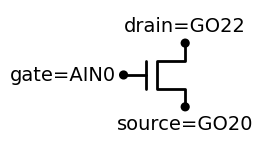

In [34]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

To cancel out the leakage current and shunt resistance, you may need to do a subtraction in Section 5.1.

$I_{ds} = I_{GO20} - I_{GO20}|_{V_{gs} = 0}$ 

Note: It's better to measure source because its leakage is constant in this lab

* You have to set the input voltage demultiplexer by sending a configuration event:
* Check the configuration is correct. If the measured result is not as expected, try sending the configration event again.

In [58]:
coach.open() # open the CoACH board if you came back here
coach.setup_nfet()

# Getting the leakage current
coach.set_nfet_vg(0)
Id0 = coach.measure_nfet_id()

vdd=1.8
coach.set_nfet_vb(0) # does nothing; we cannot set it since it defines ground
coach.set_nfet_vs(0)
coach.set_nfet_vd(1)
coach.set_nfet_vg(.5)
Is_n=coach.measure_nfet_is()
Id_n=coach.measure_nfet_id()
print(f'The measured NFET currents are Is_n={ef(Is_n)}A and Id_p={ef(Id_n)}')

# canceling the leakage current and shunt resistance
Id_n=coach.measure_nfet_id() - Id0
print(f'The corrected Id_n={ef(Id_n)}')

coach.close()

[INFO]: 2025-10-13 10:12:02,438 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)
[INFO]: 2025-10-13 10:12:02,493 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


The measured NFET currents are Is_n=732.42nA and Id_p=4.13u
The corrected Id_n=24.41n


* Question: Check if the measured currents change with different gate voltages?

In [59]:
coach.open() # open the CoACH board if you came back here
coach.setup_nfet()

# Getting the leakage current
coach.set_nfet_vg(0)
Id0 = coach.measure_nfet_id()

vdd=1.8
coach.set_nfet_vb(0) # does nothing; we cannot set it since it defines ground
coach.set_nfet_vs(0)
coach.set_nfet_vd(1)
coach.set_nfet_vg(.9)
Is_n=coach.measure_nfet_is()
Id_n=coach.measure_nfet_id()
print(f'The measured NFET currents are Is_n={ef(Is_n)}A and Id_p={ef(Id_n)}')

# canceling the leakage current and shunt resistance
Id_p=coach.measure_pfet_id() - Id0
print(f'The measured corrected Id_p={ef(Id_p)}')

coach.close()

[INFO]: 2025-10-13 10:12:17,834 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)
[INFO]: 2025-10-13 10:12:17,886 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


The measured NFET currents are Is_n=9.57uA and Id_p=12.87u
The measured corrected Id_p=2.32u


<a id='config_pfet'></a>
## 4.3 Configurations for P-FET

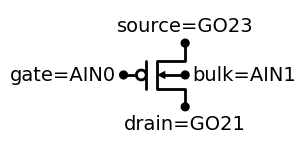

In [60]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

Hint: To cancel out the leakage current and shunt resistance, you may need to do a subtraction:

$I_{ds} = I_{GO23} - I_{GO23}|_{V_{gs} = 0} $

Note: Measure drain of PFET in this lab. 
Also think about the difference of $V_{gs}$ between PMOS and NMOS?

In [61]:
coach.open() # open the CoACH board if you came back here
# p.open('/dev/ttyUSB0') # you might need this on WSL2 Ubuntu
coach.setup_pfet()

vdd=1.8 # define power supply since pfet is referenced to it
coach.set_pfet_vb(vdd)
coach.set_pfet_vs(vdd)
coach.set_pfet_vd(0) # set drain below source and from vdd
coach.set_pfet_vg(vdd-.5) # set gate below vdd
Is_p=coach.measure_pfet_is() # measure source current (at vdd side)
Id_p=coach.measure_pfet_id() # measure drain current (at lower voltage side)
print(f'The measured PFET currents are Is_p={ef(Is_p)}A and Id_p={ef(Id_p)}')

coach.close()

[INFO]: 2025-10-13 10:17:36,379 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)
[INFO]: 2025-10-13 10:17:36,432 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


The measured PFET currents are Is_p=537.11nA and Id_p=6.54u


# 5 Ohmic region of superthreshold tranconductance

In this experiment you will characterize the *linear* dependence of the current on the gate
voltage in the strong-inversion ohmic region, i.e. with $V_{ds}$ a small voltage for both NFET and PFET at the same time.

**(a)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region, using small $V_{ds}$ and large range of $V_{gs}$

* What will be the fixed value for source and drain voltages?


* To get the quantized DAC voltages, record the returned value from _set_nfet_vX()_, e.g.
```python
    v=p.set_nfet_vg(1)
```

## Data acquisition function

We may as well define a function `measure_n_and_p_fet_ids_vs_vgs` to measure both NFET and PFET drain currents vs a gate voltage array since we need to do this multiple times  


In [89]:
def measure_n_and_p_fet_ids_vs_vgs(coach, vs, vd, vb, vg_arr):
    """Measure NFET and PFET Ids vs vg. The pfet voltages are relative to Vdd and positive.
    
    :param coach: the Coach() board object
    :param vs: the Vs you want;
    :param vd: the Vd you want
    :param vb: the Vb (bulk) you want
    :param vg_arr: a numpy.ndarray of gate voltages
    :return: vgn_actual,id_n,is_n,   vgp_actual,id_p,is_p. 
        The actual gate voltages are quantized by the DACs.
        Both source (is) and drain (id) currents are returned. Which one to use depends on the experiment
    """
    coach.open()
    vdd=1.8
    vds=vd-vs
    n_samples=vg_arr.size
    vgn_actual=np.zeros_like(vg_arr) # for actual vgs of NFET
    vgp_actual=np.zeros_like(vg_arr) # for actual vgs of PFET
    id_n=np.zeros_like(vg_arr) # for NFET
    is_n=np.zeros_like(vg_arr) 
    id_p=np.zeros_like(vg_arr) 
    is_p=np.zeros_like(vg_arr) 
    delay=.05
    coach.setup_nfet()
    print('*** NFET data')
    for i,v in enumerate(vg_arr): # note how enumerate returns the index i and the gate voltage v
        coach.set_nfet_vb(vb)
        coach.set_nfet_vs(vs)
        coach.set_nfet_vd(vd)
        vgn_actual[i]=coach.set_nfet_vg(v)
        time.sleep(delay)
        is_n[i]=coach.measure_nfet_is()
        id_n[i]=coach.measure_nfet_id()

        if i%10==0:
            print(f'NFET vgs={ef(v)}: id_n={ef(id_n[i])}, is_n={ef(is_n[i])}')

    coach.setup_pfet()
    print('*** PFET data')
    for i,v in enumerate(vg_arr): # note how enumerate returns the index i and the gate voltage v
        coach.set_pfet_vb(vdd-vb)
        coach.set_pfet_vs(vdd-vs)
        coach.set_pfet_vd(vdd-vd)
        vgp_actual[i]=vdd-coach.set_pfet_vg(vdd-v) # store vsg from vdd
        time.sleep(delay)
        id_p[i]=coach.measure_pfet_id()
        is_p[i]=coach.measure_pfet_is()
        if i%10==0:
            print(f'PFET vgs={ef(v)}: id_p={ef(id_p[i])}, is_p={ef(is_p[i])}')
    coach.close()
    # plot 
    plt.plot(vgn_actual,id_n, vgn_actual,is_n)
    plt.plot(vgp_actual,id_p, vgp_actual,is_p)
    plt.title(f'Ids vs Vgs for Vds={ef(vds)}V')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
    plt.legend(['$I_d$ NFET','$I_s$ NFET','$I_d$ PFET','$I_s$ PFET'])
    return vgn_actual,id_n,is_n, vgp_actual,id_p,is_p

* Now do the actual measurement

If the results do not look reasonable, see the [README](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md#how-fet-currents-are-measuredd) to check your current ADC gain settings.

For these superthreshold measurements, you need to sweep from just below threshold to way above it, up to the limit of the current sensing of the CoACH board.

[INFO]: 2025-10-13 11:05:35,826 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


*** NFET data
NFET vgs=800m: id_n=7.69u, is_n=4.88u
NFET vgs=890.91m: id_n=12.55u, is_n=9.96u
NFET vgs=981.82m: id_n=18.60u, is_n=16.28u
NFET vgs=1.07: id_n=25.95u, is_n=24.07u
NFET vgs=1.16: id_n=34.62u, is_n=33.03u
NFET vgs=1.25: id_n=44.26u, is_n=42.97u
NFET vgs=1.35: id_n=55.40u, is_n=54u
NFET vgs=1.44: id_n=67.09u, is_n=65.87u
NFET vgs=1.53: id_n=79.30u, is_n=77.98u
NFET vgs=1.62: id_n=92.43u, is_n=91.46u
*** PFET data
PFET vgs=800m: id_p=6.76u, is_p=2.81u
PFET vgs=890.91m: id_p=6.86u, is_p=3.27u
PFET vgs=981.82m: id_p=7.01u, is_p=4.66u
PFET vgs=1.07: id_p=7.37u, is_p=6.54u
PFET vgs=1.16: id_p=8.30u, is_p=8.45u
PFET vgs=1.25: id_p=10.47u, is_p=10.94u
PFET vgs=1.35: id_p=13.01u, is_p=13.67u
PFET vgs=1.44: id_p=15.89u, is_p=16.60u
PFET vgs=1.53: id_p=19.19u, is_p=19.75u
PFET vgs=1.62: id_p=22.36u, is_p=23.05u


[INFO]: 2025-10-13 11:05:47,411 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


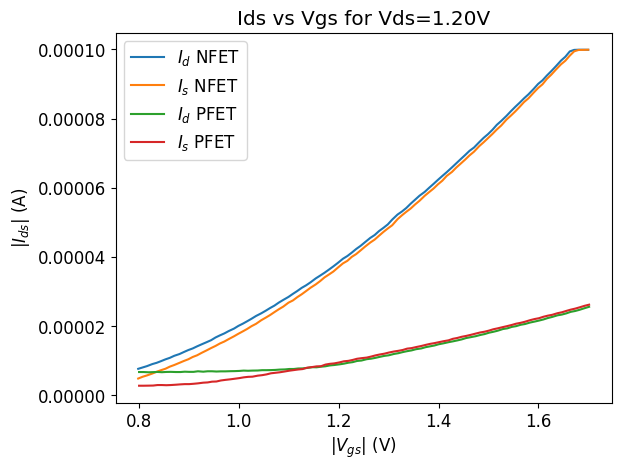

In [90]:
n_samples=100
vdd=1.8
vs=0
vd=1.2 # NOTE play to get 'best' results
vb=0
vds=vd-vs
vg_low=.8 # NOTE adjust to capture only range that current ADC can capture without saturating
vg_high=vdd-0.1 # NOTE adjust to capture only range that current ADC can capture without saturating
vg_arr=np.linspace(vg_low,vg_high,n_samples)

# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
vgn_actual,id_n,is_n, vgp_actual,id_p,is_p = measure_n_and_p_fet_ids_vs_vgs(coach, vs,vd ,vb, vg_arr)

# NOTE choose the ones that look best here
ids_n=is_n
#ids_p=id_p 
ids_p=is_p 

In [91]:
# if the data looks good, save it
savevars(datapath/'ids-vs-vgs-ohmic', overwrite='yes')

        

[INFO]: 2025-10-13 11:05:48,026 - saveloadvars - Saved to data/lab3/ids-vs-vgs-ohmic.dill variables [ datapath vdd Is_n Id_n Is_p Id_p Id0 Is0 n_samples vs vd vb vds vg_low vg_high vg_arr vgn_actual id_n is_n vgp_actual id_p is_p ids_n ids_p idn_corr idp_corr vgn_lin idn_lin vgp_lin idp_lin fit_n fit_p idn_fit idp_fit vt0_n vt0_p beta_n beta_p beta_np_ratio ] (File "/Users/mariusfauteux/Documents/CoACH-labs/.conda/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 219, in savevars)
[WARNING]: 2025-10-13 11:05:48,026 - saveloadvars - could not pickle: ['coach', 'd', 'Q'] (File "/Users/mariusfauteux/Documents/CoACH-labs/.conda/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 221, in savevars)


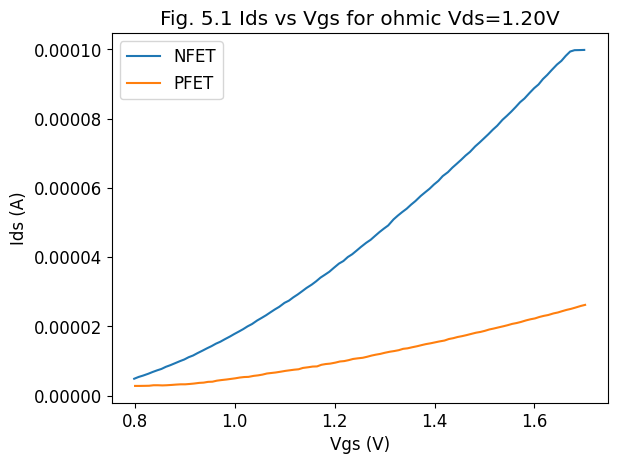

In [92]:
# plot 
plt.plot(vgn_actual,ids_n)
plt.plot(vgp_actual,ids_p)
plt.title(f'Fig. 5.1 Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('Ids (A)')
plt.xlabel('Vgs (V)')
plt.legend(['NFET','PFET'])


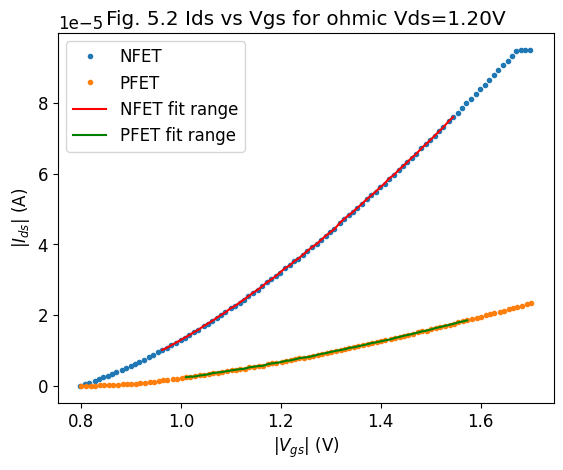

In [93]:
# extract the valid range
def get_linear_range(vg:np.array,id:np.ndarray, range=[.1,.8]): # type hint for completion
    """ gets the vg and id that line in range of the source data
    
    :param vg: the gate voltages
    :param id: the drain currents
    :param range: [low,high] the range as fractions 0-1 of selected id currents
    :return: the selected vg,id
    """
    imin=np.min(id); imax=np.max(id)
    irange=imax-imin
    ilow=irange*range[0]
    ihigh=irange*range[1]
    idx=np.where((id>ilow) & (id<ihigh))
    if len(idx)==0:
        print('no id values are between {ef(imin*factor)} and {ef(id<imax/factor)}; change factors')
    return vg[idx], id[idx]

# first, subtract the minimum measured current which we consider the leakage current
idn_corr=ids_n-np.min(ids_n)
idp_corr=ids_p-np.min(ids_p)

vgn_lin,idn_lin=get_linear_range(vgn_actual,idn_corr)
vgp_lin,idp_lin=get_linear_range(vgp_actual,idp_corr)

# plot 
plt.plot(vgn_actual,idn_corr,'.')
plt.plot(vgp_actual,idp_corr,'.')
plt.plot(vgn_lin,idn_lin,'r-')
plt.plot(vgp_lin,idp_lin,'g-')
plt.title(f'Fig. 5.2 Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('|$I_{ds}|$ (A)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET','NFET fit range','PFET fit range'])



(b) Now fit in the valid range (replace the lines showing your selected data with the actual fitted lines) to determine beta and VT0.

NFET: VT0 = 0.905 V, beta = 95.05u A/V²
PFET: VT0 = 0.956 V, beta = 24.03u A/V²
Beta ratio (NFET/PFET) = 3.96


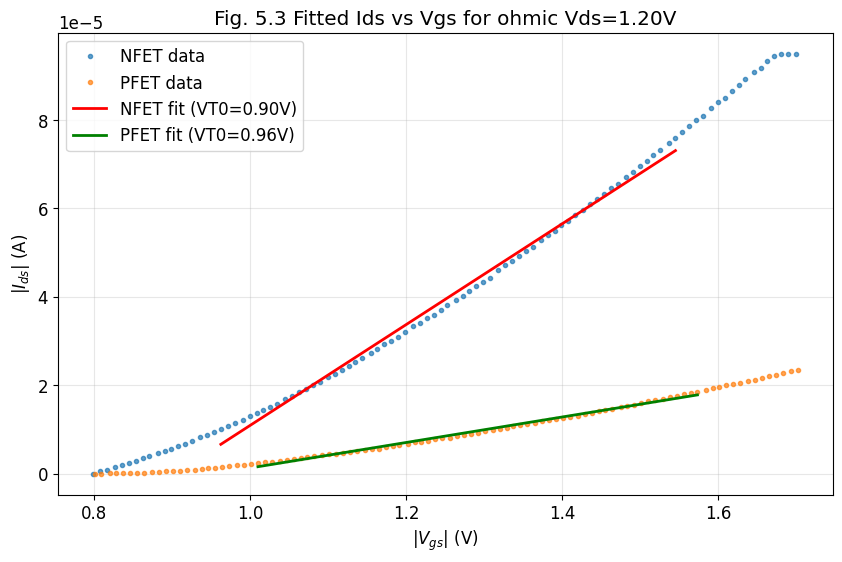

In [94]:
# Linear fit to determine beta and VT0 for both NFET and PFET
fit_n = stats.linregress(vgn_lin, idn_lin)  # NFET linear fit
fit_p = stats.linregress(vgp_lin, idp_lin)  # PFET linear fit

# Calculate fitted current values
idn_fit = fit_n.intercept + vgn_lin * fit_n.slope
idp_fit = fit_p.intercept + vgp_lin * fit_p.slope

# Extract threshold voltages (x-intercept where y=0)
# For linear fit y = mx + b, x-intercept = -b/m
vt0_n = -fit_n.intercept / fit_n.slope
vt0_p = -fit_p.intercept / fit_p.slope

# Extract beta values from slope
# From Ids = beta * (Vgs - VT) * Vds, slope = beta * Vds
# Therefore beta = slope / Vds
beta_n = fit_n.slope / vds
beta_p = fit_p.slope / vds

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(vgn_actual, idn_corr, '.', label='NFET data', alpha=0.7)
plt.plot(vgp_actual, idp_corr, '.', label='PFET data', alpha=0.7)
plt.plot(vgn_lin, idn_fit, 'r-', linewidth=2, label=f'NFET fit (VT0={vt0_n:.2f}V)')
plt.plot(vgp_lin, idp_fit, 'g-', linewidth=2, label=f'PFET fit (VT0={vt0_p:.2f}V)')
plt.title(f'Fig. 5.3 Fitted Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('|$I_{ds}|$ (A)')
plt.xlabel('|$V_{gs}|$ (V)')
plt.legend()
plt.grid(True, alpha=0.3)

# Print extracted parameters
print(f'NFET: VT0 = {vt0_n:.3f} V, beta = {ef(beta_n)} A/V²')
print(f'PFET: VT0 = {vt0_p:.3f} V, beta = {ef(beta_p)} A/V²')
print(f'Beta ratio (NFET/PFET) = {beta_n/beta_p:.2f}')


**(c)** Determine $V_{T0}$ and $\beta$ for both devices by using your fit to estimate the threshold voltage $V_{T}$ and transconductance paramter $\beta$, based on the expressions derived in the prelab

In [95]:
# V_T0 for N and P FETs, you fill in the computations here based on your fit parameters extracted above
# units: fit.slope is A/V, fit.intercept is V
# ids=beta*(vg-vt)*vds

# For linear fit y = mx + b, x-intercept where y=0 is x = -b/m
vt0_n = -fit_n.intercept / fit_n.slope  # NFET threshold voltage
vt0_p = -fit_p.intercept / fit_p.slope  # PFET threshold voltage

# From Ids = beta * (Vgs - VT) * Vds, slope = beta * Vds
# Therefore beta = slope / Vds
beta_n = fit_n.slope / vds  # NFET transconductance parameter
beta_p = fit_p.slope / vds  # PFET transconductance parameter

# compute ratio
beta_np_ratio = beta_n / beta_p
print(f'V_TOn={vt0_n:.2f}V, beta_n={ef(beta_n)}A/V^2\nV_TOp={vt0_p:.2f}V, beta_p={ef(beta_p)}A/V^2')
print(f'Beta ratio NFET/PFET is {beta_np_ratio:.2f}')

V_TOn=0.90V, beta_n=95.05uA/V^2
V_TOp=0.96V, beta_p=24.03uA/V^2
Beta ratio NFET/PFET is 3.96


* Does the ratio between $\beta$ for the 2 devices make sense based on the relative mobilities of electrons and holes? Please comment on your results.

Yes, it does, as our measured $\beta$ ratio of $3.92$ is close to the expected mobility ratio of $\approx 3.11$.

* Is the relationship between $I_{ds}$ and $V_{gs}-V_T$ really linear? What is likely the cause of any discrepancy?

It's not tottaly linear as some effects can cause deviation, like subthreshold leakage and the source drain resistance that can reduse the effective $V_{ds}$.

## 5.1 Effective surface mobility (optional)

Hint: Use the $V_{T0}$ you obtained in the last experiments but assume $\beta$ changes with $V_{gs}$ (thus $\mu_n$ and $\mu_p$ changes). **No need to measure again.**

In [ ]:
# plot mu vs Vgs for both devices in the same figure, i.e. the derivative of beta

- Why does the mobility peak and then decay instead of remaining constant? 

- What is the ratio between the **peak** mobilities for electrons and holes?

- How different are these values from the bulk mobilities for electrons (1350 ${\rm cm^2/V/s}$) and holes (480 ${\rm cm^2/V/s}$)? 

# 6 Drain Current in the saturation region

In this experiment, repeat nearly exactly the same experiement but with a **large** $V_{ds}$, to measure the _quadratic_ dependence of the current on the gate
voltage in the saturation region. 

* Repeat the experiments from Section 5 with a large $V_{ds}$.
* Remember you should plot $\sqrt(I_{ds}))$ vs. $V_{gs}$ to see if it behaves linearly as predicted.

[INFO]: 2025-10-13 11:15:41,595 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


*** NFET data
NFET vgs=400m: id_n=5.76u, is_n=732.42n
NFET vgs=531.31m: id_n=5.79u, is_n=708.01n
NFET vgs=662.63m: id_n=6.13u, is_n=830.08n
NFET vgs=793.94m: id_n=7.67u, is_n=4.79u
NFET vgs=925.25m: id_n=14.67u, is_n=12.23u
NFET vgs=1.06: id_n=24.76u, is_n=22.66u
NFET vgs=1.19: id_n=37.33u, is_n=35.86u
NFET vgs=1.32: id_n=52.27u, is_n=51.07u
NFET vgs=1.45: id_n=69.24u, is_n=67.87u
NFET vgs=1.58: id_n=87.28u, is_n=86.33u
*** PFET data
PFET vgs=400m: id_p=6.57u, is_p=1.68u
PFET vgs=531.31m: id_p=6.54u, is_p=1.61u
PFET vgs=662.63m: id_p=6.59u, is_p=1.68u
PFET vgs=793.94m: id_p=6.74u, is_p=1.95u
PFET vgs=925.25m: id_p=6.86u, is_p=3.61u
PFET vgs=1.06: id_p=7.28u, is_p=6.15u
PFET vgs=1.19: id_p=8.84u, is_p=9.33u
PFET vgs=1.32: id_p=12.28u, is_p=12.96u
PFET vgs=1.45: id_p=16.46u, is_p=17.07u
PFET vgs=1.58: id_p=21.07u, is_p=21.87u


[INFO]: 2025-10-13 11:15:53,191 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


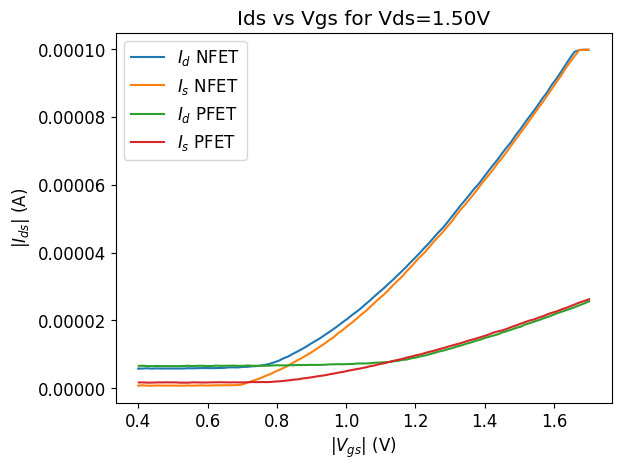

In [100]:
n_samples=100
vdd=1.8
vs=0
vd=1.5 # Large Vds for saturation region
vb=0
vds_sat=vd-vs
vg_low=0.4 # Start from below threshold
vg_high=1.7 # Go up to reasonable gate voltage
vg_arr=np.linspace(vg_low,vg_high,n_samples)

# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
vgn_actual_sat, ids_n_sat, is_n_sat, vgp_actual_sat, ids_p_sat, is_p_sat = measure_n_and_p_fet_ids_vs_vgs(coach, vs, vd, vb, vg_arr)


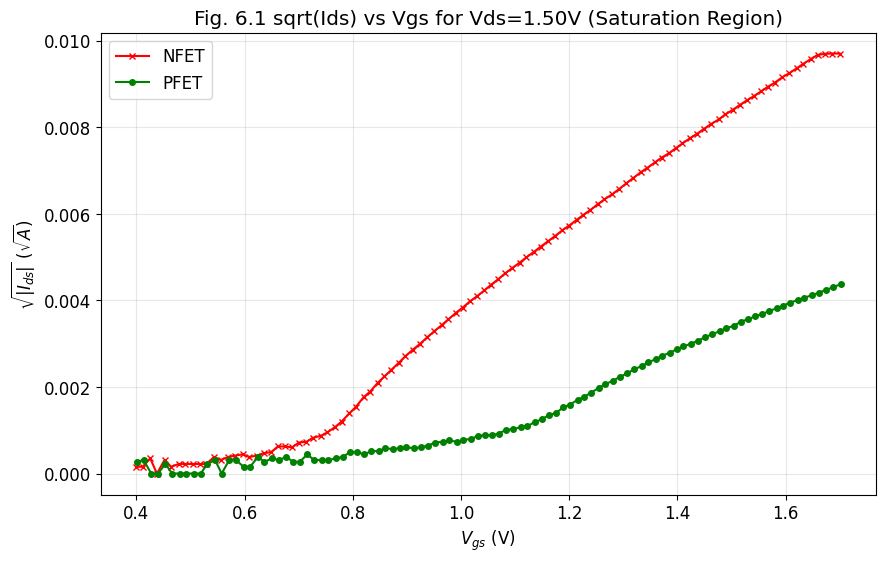

In [101]:
# Correct the currents by subtracting leakage
ids_n_sat_corr = ids_n_sat - np.min(ids_n_sat)
ids_p_sat_corr = ids_p_sat - np.min(ids_p_sat)

# plot sqrt(Ids) vs Vgs for saturation region
plt.figure(figsize=(10, 6))
plt.plot(vgn_actual_sat, np.sqrt(np.abs(ids_n_sat_corr)), 'r-x', label='NFET', markersize=4)
plt.plot(vgp_actual_sat, np.sqrt(np.abs(ids_p_sat_corr)), 'g-o', label='PFET', markersize=4)
plt.title(f'Fig. 6.1 sqrt(Ids) vs Vgs for Vds={ef(vds_sat)}V (Saturation Region)')
plt.ylabel('$\sqrt{|I_{ds}|}$ ($\sqrt{A}$)')
plt.xlabel('$V_{gs}$ (V)')
plt.legend()
plt.grid(True, alpha=0.3)



In [106]:
# Save the saturation data
savevars(datapath/'ids-vs-vgs-saturation', overwrite='yes')

[INFO]: 2025-10-13 11:23:53,966 - saveloadvars - Saved to data/lab3/ids-vs-vgs-saturation.dill variables [ datapath vdd Is_n Id_n Is_p Id_p Id0 Is0 n_samples vs vd vb vds vg_low vg_high vg_arr vgn_actual id_n is_n vgp_actual id_p is_p ids_n ids_p idn_corr idp_corr vgn_lin idn_lin vgp_lin idp_lin fit_n fit_p idn_fit idp_fit vt0_n vt0_p beta_n beta_p beta_np_ratio vds_sat vgn_actual_sat ids_n_sat is_n_sat vgp_actual_sat ids_p_sat is_p_sat ids_n_sat_corr ids_p_sat_corr vgn_fit sqrt_idn_fit vgp_fit sqrt_idp_fit fit_n_sat fit_p_sat vt0_n_sat vt0_p_sat beta_n_sat beta_p_sat sqrt_idn_fitted sqrt_idp_fitted idn_corr_sat idp_corr_sat vgn_lin_sat idn_lin_sat vgp_lin_sat idp_lin_sat idn_fit_sat idp_fit_sat ] (File "/Users/mariusfauteux/Documents/CoACH-labs/.conda/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 219, in savevars)
[WARNING]: 2025-10-13 11:23:53,967 - saveloadvars - could not pickle: ['coach', 'd', 'Q'] (File "/Users/mariusfauteux/Documents/CoACH-labs/.conda/lib/python3.

* From this saturation data, extract $\beta$ and $V_{T0}$

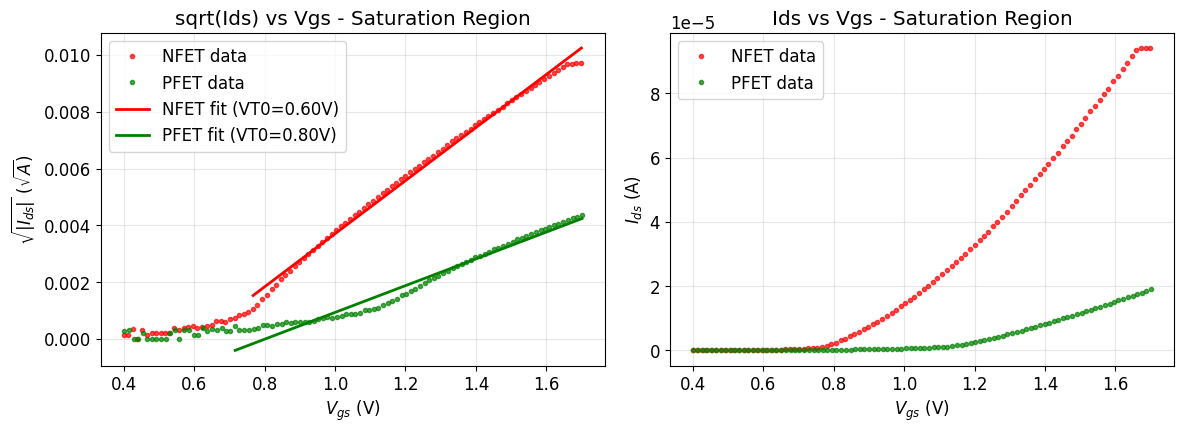

Saturation Region Parameters:
NFET: VT0 = 0.603 V, β = 174.49u A/V²
PFET: VT0 = 0.802 V, β = 44.39u A/V²
Beta ratio (NFET/PFET) = 3.93

Comparison with Ohmic Region:
NFET VT0: Ohmic=0.905V, Saturation=0.603V, Diff=0.301V
PFET VT0: Ohmic=0.956V, Saturation=0.802V, Diff=0.155V
NFET β: Ohmic=95.05uA/V², Saturation=174.49uA/V², Ratio=1.84
PFET β: Ohmic=24.03uA/V², Saturation=44.39uA/V², Ratio=1.85


In [105]:
# Extract β and VT0 from saturation data using sqrt(Ids) vs Vgs fit
# For saturation: Ids = (β/2) * (Vgs - VT)²
# Taking square root: sqrt(Ids) = sqrt(β/2) * (Vgs - VT)
# This gives us a linear relationship: sqrt(Ids) = m * Vgs + b
# where m = sqrt(β/2) and b = -sqrt(β/2) * VT
# Therefore: VT = -b/m and β = 2 * m²

# Select linear range for fitting (above threshold)
def get_saturation_fit_range(vg, sqrt_id, threshold_factor=0.1):
    """Get the linear range for sqrt(Ids) vs Vgs fitting in saturation region"""
    max_sqrt_id = np.max(sqrt_id)
    min_sqrt_id = np.min(sqrt_id)
    threshold = min_sqrt_id + threshold_factor * (max_sqrt_id - min_sqrt_id)
    
    # Find indices where sqrt(Ids) is above threshold
    idx = np.where(sqrt_id > threshold)[0]
    return vg[idx], sqrt_id[idx]

# Get fit ranges for both devices
vgn_fit, sqrt_idn_fit = get_saturation_fit_range(vgn_actual_sat, np.sqrt(np.abs(ids_n_sat_corr)))
vgp_fit, sqrt_idp_fit = get_saturation_fit_range(vgp_actual_sat, np.sqrt(np.abs(ids_p_sat_corr)))

# Linear fits for sqrt(Ids) vs Vgs
fit_n_sat = stats.linregress(vgn_fit, sqrt_idn_fit)
fit_p_sat = stats.linregress(vgp_fit, sqrt_idp_fit)

# Extract parameters
# VT = -b/m where b is intercept and m is slope
vt0_n_sat = -fit_n_sat.intercept / fit_n_sat.slope
vt0_p_sat = -fit_p_sat.intercept / fit_p_sat.slope

# β = 2 * m² where m is slope
beta_n_sat = 2 * (fit_n_sat.slope ** 2)
beta_p_sat = 2 * (fit_p_sat.slope ** 2)

# Calculate fitted curves
sqrt_idn_fitted = fit_n_sat.slope * vgn_fit + fit_n_sat.intercept
sqrt_idp_fitted = fit_p_sat.slope * vgp_fit + fit_p_sat.intercept

# Plot results
plt.figure(figsize=(12, 8))

# Plot 1: sqrt(Ids) vs Vgs with fits
plt.subplot(2, 2, 1)
plt.plot(vgn_actual_sat, np.sqrt(np.abs(ids_n_sat_corr)), 'r.', alpha=0.7, label='NFET data')
plt.plot(vgp_actual_sat, np.sqrt(np.abs(ids_p_sat_corr)), 'g.', alpha=0.7, label='PFET data')
plt.plot(vgn_fit, sqrt_idn_fitted, 'r-', linewidth=2, label=f'NFET fit (VT0={vt0_n_sat:.2f}V)')
plt.plot(vgp_fit, sqrt_idp_fitted, 'g-', linewidth=2, label=f'PFET fit (VT0={vt0_p_sat:.2f}V)')
plt.title('sqrt(Ids) vs Vgs - Saturation Region')
plt.ylabel('$\sqrt{|I_{ds}|}$ ($\sqrt{A}$)')
plt.xlabel('$V_{gs}$ (V)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Ids vs Vgs (original data)
plt.subplot(2, 2, 2)
plt.plot(vgn_actual_sat, ids_n_sat_corr, 'r.', alpha=0.7, label='NFET data')
plt.plot(vgp_actual_sat, ids_p_sat_corr, 'g.', alpha=0.7, label='PFET data')
plt.title('Ids vs Vgs - Saturation Region')
plt.ylabel('$I_{ds}$ (A)')
plt.xlabel('$V_{gs}$ (V)')
plt.legend()
plt.grid(True, alpha=0.3)

""" # Plot 3: Comparison with ohmic region parameters
plt.subplot(2, 2, 3)
plt.bar(['NFET VT0', 'PFET VT0'], [vt0_n_sat, vt0_p_sat], color=['red', 'green'], alpha=0.7)
plt.title('Threshold Voltages - Saturation vs Ohmic')
plt.ylabel('$V_{T0}$ (V)')
plt.xticks(rotation=45)

# Plot 4: Beta comparison
plt.subplot(2, 2, 4)
plt.bar(['NFET β', 'PFET β'], [beta_n_sat*1e6, beta_p_sat*1e6], color=['red', 'green'], alpha=0.7)
plt.title('Transconductance Parameters - Saturation')
plt.ylabel('β (μA/V²)')
plt.xticks(rotation=45) """

plt.tight_layout()
plt.show()

# Print extracted parameters
print(f'Saturation Region Parameters:')
print(f'NFET: VT0 = {vt0_n_sat:.3f} V, β = {ef(beta_n_sat)} A/V²')
print(f'PFET: VT0 = {vt0_p_sat:.3f} V, β = {ef(beta_p_sat)} A/V²')
print(f'Beta ratio (NFET/PFET) = {beta_n_sat/beta_p_sat:.2f}')

# Compare with ohmic region parameters
print(f'\nComparison with Ohmic Region:')
print(f'NFET VT0: Ohmic={vt0_n:.3f}V, Saturation={vt0_n_sat:.3f}V, Diff={abs(vt0_n-vt0_n_sat):.3f}V')
print(f'PFET VT0: Ohmic={vt0_p:.3f}V, Saturation={vt0_p_sat:.3f}V, Diff={abs(vt0_p-vt0_p_sat):.3f}V')
print(f'NFET β: Ohmic={ef(beta_n)}A/V², Saturation={ef(beta_n_sat)}A/V², Ratio={beta_n_sat/beta_n:.2f}')
print(f'PFET β: Ohmic={ef(beta_p)}A/V², Saturation={ef(beta_p_sat)}A/V², Ratio={beta_p_sat/beta_p:.2f}')


## 7 Comparisons of ohmic and saturation superthreshold transconductance models

* Are the measurements of $V_{T0}$ and $\beta$ from the saturation measurement consistent with the values obtained in the ohmic region? 

The measurements of $V_{T0}$ and $\beta$ from the saturation region are close to be consistent, but slighly differs from with the values obtained:

- **NFET**: The saturation measurement yields $V_{T0} = 0.603$ V, which is significantly lower than the ohmic region value of $V_{T0} = 0.905$ V (difference of 0.301 V).
- **PFET**: The saturation measurement yields $V_{T0} = 0.802$ V, which is lower than the ohmic region value of $V_{T0} = 0.956$ V (difference of 0.155 V).
 
 - **NFET**: The saturation measurement yields $\beta = 174.49$ μA/V², which is higher than the ohmic region value of $\beta = 95.05$ μA/V² (ratio of 1.84).
 - **PFET**: The saturation measurement yields $\beta = 44.39$ μA/V², which is higher than the ohmic region value of $\beta = 24.03$ μA/V² (ratio of 1.85).
 
 **Simple formulas for channel length modulation:**
 
 **Ohmic region (linear):**
 $$I_{ds} = \beta \left(V_{gs} - V_{T0}\right) V_{ds}$$
 
 **Saturation region (quadratic):**
 $$I_{ds} = \frac{\beta}{2} \left(V_{gs} - V_{T0}\right)^2$$
 
 **With channel length modulation:**
 $$I_{ds} = \frac{\beta}{2} \left(V_{gs} - V_{T0}\right)^2 \left(1 + \frac{V_{ds}}{V_A}\right)$$
 
 where $V_A$ is the Early voltage.

**Possible Explanation:**
1. **Channel length modulation**: In saturation, the effective channel length decreases with increasing $V_{ds}$, affecting both threshold voltage and transconductance.



* Which is a better approximation, the linear one or the quadratic?

For large Vds, the quadratic model is better.

# 7 Early effect - Channel length modulation - Drain conductance

This experiment studies how Early voltage scales with transistor current; in particular, how valid are the simple assumptions about channel length modulation?

The measurements are nearly identical to previous one, only for each curve you will fix $V_{gs}$ and sweep $V_{ds}$, always still measuring $I_{ds}$. 

For your convenience, we made a function `measure_n_and_p_fet_ids_vs_vds` to do the measurement:

In [108]:
def measure_n_and_p_fet_ids_vs_vds(coach, vg_n, vg_p, vs, vb, vd_arr):
    """Measure NFET and PFET Ids vs Vds. The pfet voltages are set relative to Vdd and negated for you.
    
    :param coach: the Coach() board object
    :param vg_n: the NFET gate voltage (abs value relative to bulk)
    :param vg_p: the PFET gate voltage (abs value relative to bulk)
    :param vs: the Vs you want;
    :param vb: the Vb (bulk) you want
    :param vd_arr: np.ndarray of drain voltages, (abs value relative to bulk)
    :param measure_is: True to measure the source currents, False to measure drain currents. 
        It would seem to make more sense to measure source current because the voltage and hence leakage is fixed.
    :return: vds_actual_n, ids_n, vgp_actual_n, ids_p. 
        The quantized Vds and Ids currents.
    """
    measure_is=True # to change measurement from source to drain set False
    # actually measure_is=True measures NFET at src and PFET at drain
    coach.open()
    vdd=1.8
    ids_n=np.zeros_like(vd_arr) # for NFET
    ids_p=np.zeros_like(vd_arr) # for NFET
    vds_actual_n=np.zeros_like(vd_arr) # for NFET
    vds_actual_p=np.zeros_like(vd_arr) # for NFET
    delay=.01
    n_avg=100 # NOTE sets how many current measurements are averaged for each point
    print(f'averaging {n_avg} ids samples for each vds')

    coach.setup_nfet()
    vgn_actual=coach.set_nfet_vg(vg_n) # set gate bulk and src
    coach.set_nfet_vb(vb)
    coach.set_nfet_vs(vs)
    for i,v in enumerate(vd_arr): # note how enumerate returns the index i and the gate voltage v
        vds_actual_n[i]=coach.set_nfet_vd(v) # set drain
        time.sleep(delay)
        sum=0
        for j in range(n_avg):
            cur=(coach.measure_nfet_is() if measure_is else coach.measure_nfet_id())
            # print(f'cur {i} is {ef(cur)}A')
            sum+=cur
        avg=sum/n_avg
        ids_n[i]=avg
        # print(f'      NFET ids_n[{i}] is {ef(ids_n[i])}A')
        # ids_n[i]=coach.measure_nfet_is() if measure_is else coach.measure_nfet_id() # NOTE it might be better to measure Id here
        if i%10==0:
            print(f'NFET vg={ef(vg_n)}V vds={ef(v)}: ids_n={ef(ids_n[i])}')

    coach.setup_pfet()
    vgp_actual=vdd-coach.set_pfet_vg(vdd-vg_p) # store vsg from vdd
    coach.set_pfet_vb(vdd-vb)
    coach.set_pfet_vs(vdd-vs)
    for i,v in enumerate(vd_arr): # note how enumerate returns the index i and the gate voltage v
        vds_actual_p[i]=vdd-coach.set_pfet_vd(vdd-v)
        time.sleep(delay)
        sum=0
        for j in range(n_avg):
            cur=(coach.measure_pfet_id() if measure_is else coach.measure_pfet_is())
            # print(f'PFET cur {i} is {ef(cur)}A')
            sum+=cur
        avg=sum/n_avg
        ids_p[i]=avg
        # print(f'      PFET ids_n[{i}] is {ef(ids_p[i])}A')
        # ids_p[i]=coach.measure_pfet_id() if measure_is else coach.measure_pfet_is() # NOTE it might be better to measure Id here
        if i%10==0:
            print(f'PFET vg={ef(vg_p)}V vds={ef(v)}: ids_p={ef(ids_p[i])}')
    coach.close()
    ids_n=np.array(ids_n)
    ids_p=np.array(ids_p) # make num,py arrays to return and plot

    # subtract leakage at vds=0 from both curves
    nleak=ids_n[0]
    pleak=ids_p[0]
    print(f'subtracting leakage Ids at Vds=0 of NFET: {ef(nleak)}A PFET {ef(pleak)}A')
    ids_n-=nleak
    ids_p-=pleak
    
    # plot 
    plt.plot(vds_actual_n,ids_n,'r-*')
    plt.plot(vds_actual_p,ids_p,'g-*')
    plt.title(f'Ids vs Vds for Vg_n={ef(vg_n-vs)}V Vg_p={ef(vg_p-vs)}V')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('|$V_{ds}|$ (V)') # note absolute value here
    plt.legend(['NFET','PFET'])
    plt.show()
    return vds_actual_n,ids_n,vds_actual_p,ids_p

**(a)** Measure $I_{ds}$ vs $V_{ds}$ for different $V_{gs}$ spanning as large a range of drain currents as you can confidently measure

Here is some measurement code for your convenience. You may need to adjust values; see NOTE

[INFO]: 2025-10-13 11:33:38,896 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)
[INFO]: 2025-10-13 11:33:38,897 - NE1 - was already open (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 145, in open)


averaging 100 ids samples for each vds
NFET vg=900mV vds=0: ids_n=740.23n
NFET vg=900mV vds=620.69m: ids_n=10.19u
NFET vg=900mV vds=1.24: ids_n=10.46u
PFET vg=800mV vds=0: ids_p=6.54u
PFET vg=800mV vds=620.69m: ids_p=6.71u
PFET vg=800mV vds=1.24: ids_p=6.71u


[INFO]: 2025-10-13 11:33:41,793 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 740.23nA PFET 6.54uA


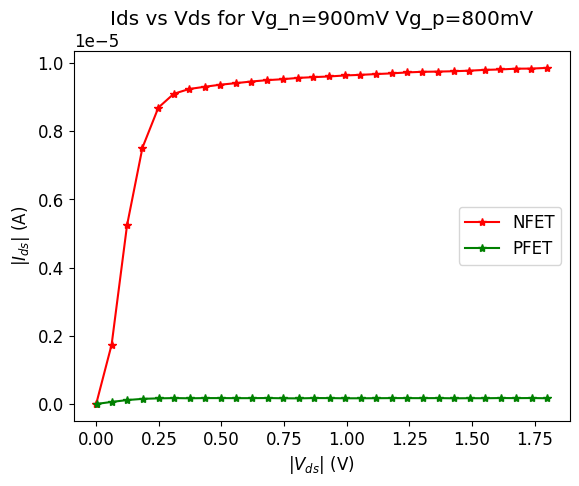

[INFO]: 2025-10-13 11:33:42,356 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=985.71mV vds=0: ids_n=737.79n
NFET vg=985.71mV vds=620.69m: ids_n=16.25u
NFET vg=985.71mV vds=1.24: ids_n=16.61u
PFET vg=900mV vds=0: ids_p=6.54u
PFET vg=900mV vds=620.69m: ids_p=6.86u
PFET vg=900mV vds=1.24: ids_p=6.86u


[INFO]: 2025-10-13 11:33:45,262 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 737.79nA PFET 6.54uA


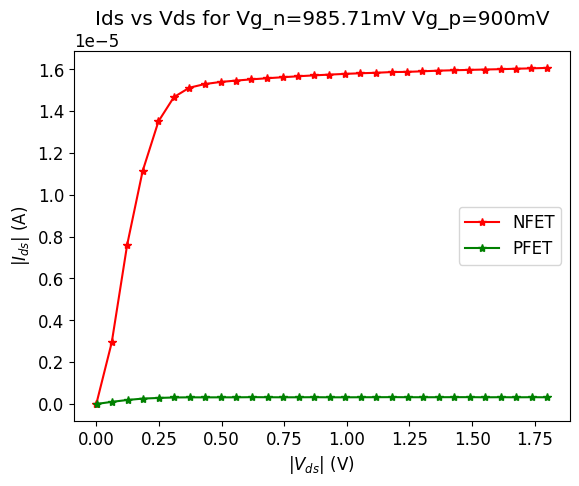

[INFO]: 2025-10-13 11:33:45,904 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.07V vds=0: ids_n=739.50n
NFET vg=1.07V vds=620.69m: ids_n=23.30u
NFET vg=1.07V vds=1.24: ids_n=23.79u
PFET vg=1V vds=0: ids_p=6.54u
PFET vg=1V vds=620.69m: ids_p=7.10u
PFET vg=1V vds=1.24: ids_p=7.11u


[INFO]: 2025-10-13 11:33:48,826 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 739.50nA PFET 6.54uA


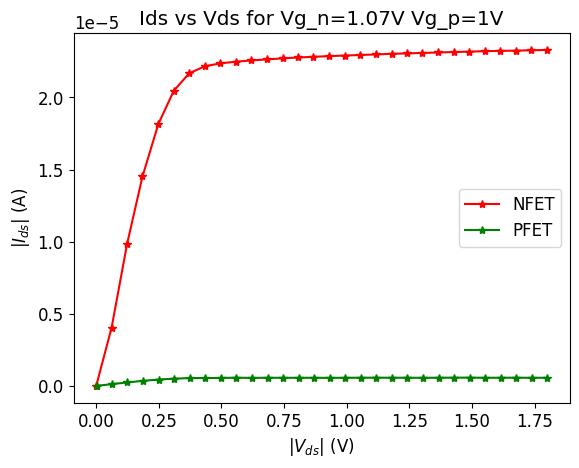

[INFO]: 2025-10-13 11:33:49,390 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.16V vds=0: ids_n=735.60n
NFET vg=1.16V vds=620.69m: ids_n=31.61u
NFET vg=1.16V vds=1.24: ids_n=32.24u
PFET vg=1.10V vds=0: ids_p=6.54u
PFET vg=1.10V vds=620.69m: ids_p=7.59u
PFET vg=1.10V vds=1.24: ids_p=7.61u


[INFO]: 2025-10-13 11:33:52,284 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 735.60nA PFET 6.54uA


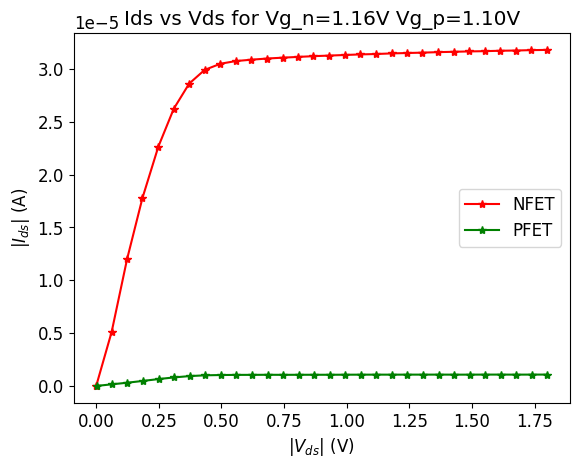

[INFO]: 2025-10-13 11:33:52,844 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.24V vds=0: ids_n=730.47n
NFET vg=1.24V vds=620.69m: ids_n=40.78u
NFET vg=1.24V vds=1.24: ids_n=41.62u
PFET vg=1.20V vds=0: ids_p=6.53u
PFET vg=1.20V vds=620.69m: ids_p=8.93u
PFET vg=1.20V vds=1.24: ids_p=9.02u


[INFO]: 2025-10-13 11:33:55,765 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 730.47nA PFET 6.53uA


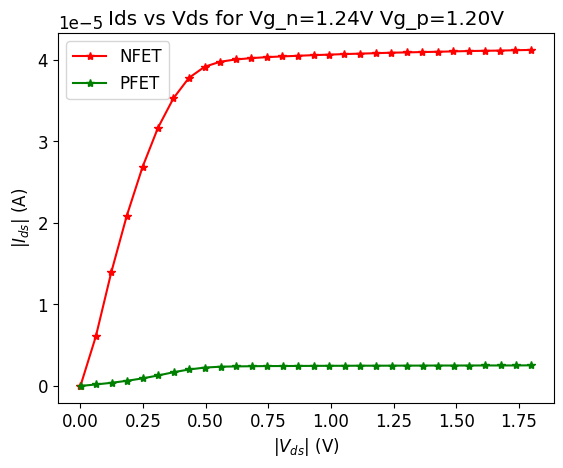

[INFO]: 2025-10-13 11:33:56,331 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.33V vds=0: ids_n=742.43n
NFET vg=1.33V vds=620.69m: ids_n=50.77u
NFET vg=1.33V vds=1.24: ids_n=52.05u
PFET vg=1.30V vds=0: ids_p=6.54u
PFET vg=1.30V vds=620.69m: ids_p=11.44u
PFET vg=1.30V vds=1.24: ids_p=11.63u


[INFO]: 2025-10-13 11:33:59,240 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 742.43nA PFET 6.54uA


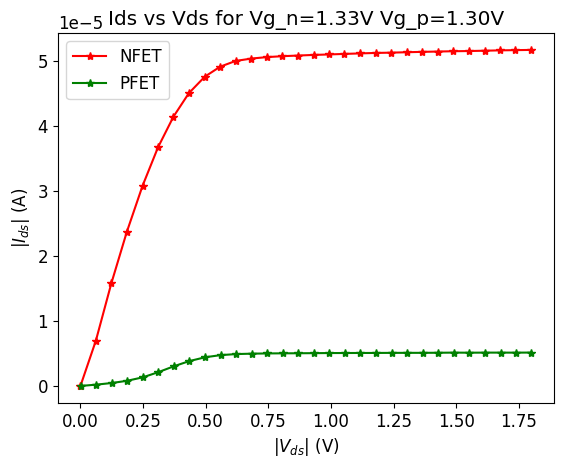

[INFO]: 2025-10-13 11:33:59,805 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.41V vds=0: ids_n=746.58n
NFET vg=1.41V vds=620.69m: ids_n=60.61u
NFET vg=1.41V vds=1.24: ids_n=62.68u
PFET vg=1.40V vds=0: ids_p=6.53u
PFET vg=1.40V vds=620.69m: ids_p=14.27u
PFET vg=1.40V vds=1.24: ids_p=14.70u


[INFO]: 2025-10-13 11:34:02,712 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 746.58nA PFET 6.53uA


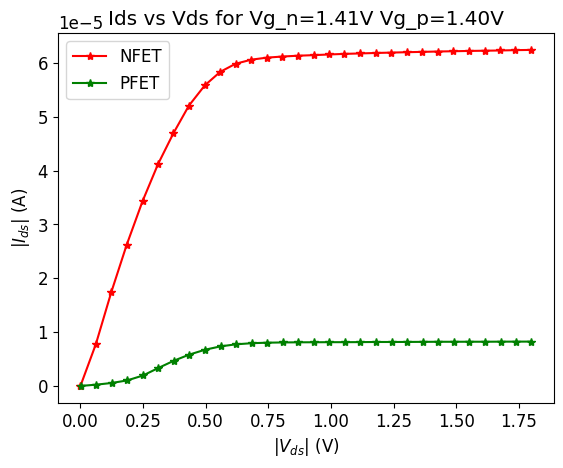

[INFO]: 2025-10-13 11:34:03,278 - NE1 - Opened CoACH at /dev/cu.usbmodem76219301 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.50V vds=0: ids_n=739.26n
NFET vg=1.50V vds=620.69m: ids_n=70.33u
NFET vg=1.50V vds=1.24: ids_n=74.23u
PFET vg=1.50V vds=0: ids_p=6.54u
PFET vg=1.50V vds=620.69m: ids_p=17.06u
PFET vg=1.50V vds=1.24: ids_p=18.06u


[INFO]: 2025-10-13 11:34:06,194 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/Documents/NE1-CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 739.26nA PFET 6.54uA


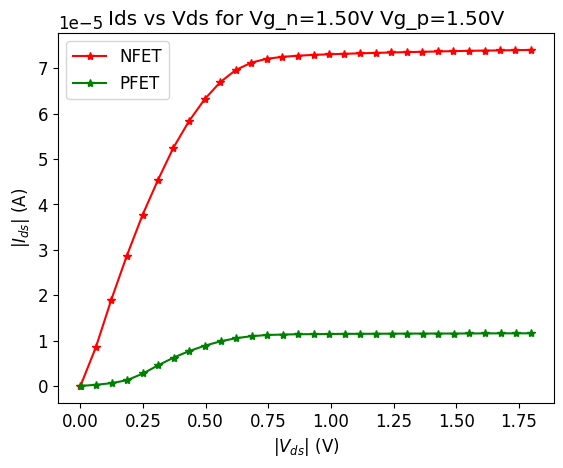

In [109]:
coach=Coach()
coach.open()
n_samples=30 # NOTE how many vds values
vdd=1.8
# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
n_gate_voltages=8
vg_arr_n=np.linspace(.9,1.5,n_gate_voltages) # NOTE you may need to play with these values
vg_arr_p=np.linspace(.8,1.5,n_gate_voltages) # NOTE you may need to play with these values
vd_arr=np.linspace(0,vdd,n_samples)
vs=0
vb=0
vds=vd_arr-vs
idsnlist=[]
idsplist=[] # make arrays and stack at the end https://stackoverflow.com/questions/58083743/what-is-the-fastest-way-to-stack-numpy-arrays-in-a-loop

for i in range(n_gate_voltages):
    vgn=vg_arr_n[i]
    vgp=vg_arr_p[i]
    vds_actual_n,ids_n,vds_actual_p,ids_p=measure_n_and_p_fet_ids_vs_vds(coach, vgn, vgp, vs, vb, vd_arr)
    idsnlist.append(ids_n)
    idsplist.append(ids_p)
ids_vs_vds_n=np.stack(idsnlist)
ids_vs_vds_p=np.stack(idsplist)

* Does the data make sense? If not change your parameters

* When you have good looking data, plot it all together

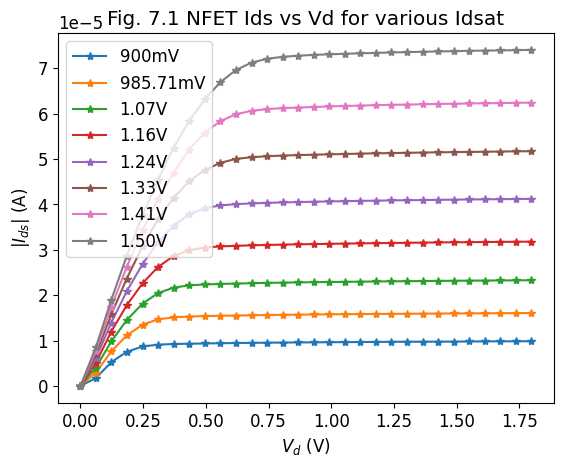

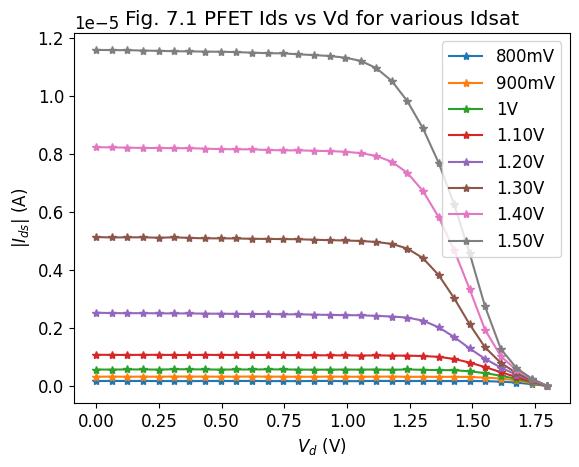

In [110]:
# plots summarized Ids vs Vds data
def plot_idsvds_curves(vg_arr, vds, ids_matrix, title):
    plt.title(f'Fig. 7.1 {title} Ids vs Vd for various Idsat')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('$V_{d}$ (V)') # note absolute value here
    leg=[]
    for i,v in enumerate(vg_arr):
        plt.plot(vds,np.transpose(ids_matrix[i,:]),'-*')
        leg.append(str(ef(v))+'V')
    plt.legend(leg)
    plt.show()
plot_idsvds_curves(vg_arr_n,vds_actual_n, ids_vs_vds_n, 'NFET')
plot_idsvds_curves(vg_arr_p,vdd-vds_actual_p,ids_vs_vds_p, 'PFET')


* **(b)** Fit a line to the ”flat” part of each drain current curve. Select a range of drain voltages to fit the line and use the same range for each curve, because the Early effect is actually curved in reality, and what you are actually seeing might include the start of Drain Induced Barrier Lowering (DIBL) or impact ionization. This is a bit unlikely for such long (1 $\mu$ m) FETs, but you can see if the slope increases for large $V_{ds}$.

**You only need to do N-FET**  You can add the PFET if you are curious about it, because it appears to have a **much** higher Early voltage.

* Compute the Early voltage from the fitted slope of I vs V and the I intercept
* Plot the Early voltage vs drain current on a semilogx scale.

In [123]:
# Save the saturation data
savevars(datapath/'section-7-b', overwrite='yes')

[INFO]: 2025-10-13 11:51:25,788 - saveloadvars - Saved to data/lab3/section-7-b.dill variables [ datapath vdd Is_n Id_n Is_p Id_p Id0 Is0 n_samples vs vd vb vds vg_low vg_high vg_arr vgn_actual id_n is_n vgp_actual id_p is_p ids_n ids_p idn_corr idp_corr vgn_lin idn_lin vgp_lin idp_lin fit_n fit_p idn_fit idp_fit vt0_n vt0_p beta_n beta_p beta_np_ratio vds_sat vgn_actual_sat ids_n_sat is_n_sat vgp_actual_sat ids_p_sat is_p_sat ids_n_sat_corr ids_p_sat_corr vgn_fit sqrt_idn_fit vgp_fit sqrt_idp_fit fit_n_sat fit_p_sat vt0_n_sat vt0_p_sat beta_n_sat beta_p_sat sqrt_idn_fitted sqrt_idp_fitted idn_corr_sat idp_corr_sat vgn_lin_sat idn_lin_sat vgp_lin_sat idp_lin_sat idn_fit_sat idp_fit_sat ids_n_ohmic_pred r2_n_ohmic ids_p_ohmic_pred r2_p_ohmic ids_n_sat_pred r2_n_sat ids_p_sat_pred r2_p_sat model_names r2_values colors bars bar value vg_theory ids_ohmic_theory ids_sat_theory ids_ohmic_theory_p ids_sat_theory_p comparison_data x width residuals_ohmic residuals_sat nfet_better pfet_better n

Text(0, 0.5, '$V_{E}$ (V)')

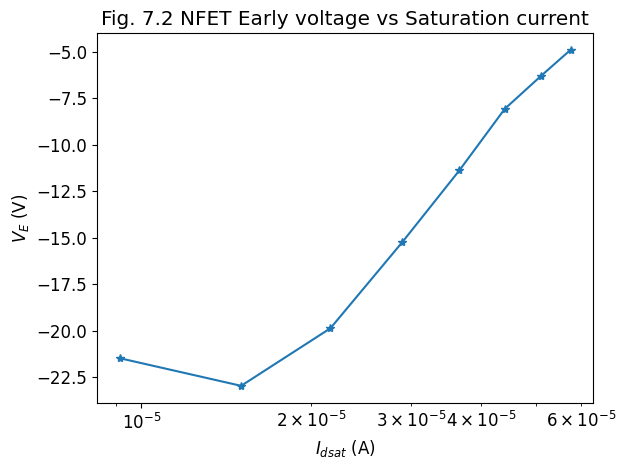

In [124]:
# the data are vg_arr_n,vds_actual_n, ids_vs_vds_n
idx=np.where(vds_actual_n>0.3)  # Select "flat" part of curve after saturation
vds=vds_actual_n[idx]
ve_fits=[]
id_sats=[]
v_earlys=[]
for i in range(ids_vs_vds_n.shape[0]): # for each drain curve
    ids=np.squeeze(ids_vs_vds_n[i,idx]) # we have to squeeze (remove the singleton dimension for this stupid array)
    ve_fit=np.polyfit(vds,ids,1) # compute linear fit, ve_fit[0] is the slope and ve_fit[1] is the y-intercept (id_sat)
    ve_fits.append(ve_fit)
    idsat=ve_fit[1] # Id_sat is y-intercept
    didv=ve_fit[0] # d(I)/d(V) is slope
    id_sats.append(idsat)
    vearly=-idsat/didv # Early voltage is -Idsat/slope (negative since slope is positive)
    v_earlys.append(vearly)

plt.semilogx(id_sats,v_earlys,'-*')
plt.title(f'Fig. 7.2 NFET Early voltage vs Saturation current')
plt.xlabel('$I_{dsat}$ (A)')
plt.ylabel('$V_{E}$ (V)')



In [ ]:
savevars(datapath/'early', overwrite='yes')

[INFO]: 2025-10-13 11:52:07,160 - saveloadvars - Saved to data/lab3/early.dill variables [ datapath vdd Is_n Id_n Is_p Id_p Id0 Is0 n_samples vs vd vb vds vg_low vg_high vg_arr vgn_actual id_n is_n vgp_actual id_p is_p ids_n ids_p idn_corr idp_corr vgn_lin idn_lin vgp_lin idp_lin fit_n fit_p idn_fit idp_fit vt0_n vt0_p beta_n beta_p beta_np_ratio vds_sat vgn_actual_sat ids_n_sat is_n_sat vgp_actual_sat ids_p_sat is_p_sat ids_n_sat_corr ids_p_sat_corr vgn_fit sqrt_idn_fit vgp_fit sqrt_idp_fit fit_n_sat fit_p_sat vt0_n_sat vt0_p_sat beta_n_sat beta_p_sat sqrt_idn_fitted sqrt_idp_fitted idn_corr_sat idp_corr_sat vgn_lin_sat idn_lin_sat vgp_lin_sat idp_lin_sat idn_fit_sat idp_fit_sat ids_n_ohmic_pred r2_n_ohmic ids_p_ohmic_pred r2_p_ohmic ids_n_sat_pred r2_n_sat ids_p_sat_pred r2_p_sat model_names r2_values colors bars bar value vg_theory ids_ohmic_theory ids_sat_theory ids_ohmic_theory_p ids_sat_theory_p comparison_data x width residuals_ohmic residuals_sat nfet_better pfet_better n_gate_

* Comment on your results: How constant is the Early voltage with drain current? Speculate on the reasons for your observations.

# 8 Saturation drain voltage

* Can you see how the saturation voltage increases with the gate overdrive $V_{\rm ov}$ in strong inversion? Please comment if the observation matches the model of $V_{\rm dsat}$ or not. I.e. is it true quantitatively that $V_{\rm dsat}=V_{\rm ov}$?


* Using your prior measurement of $V_{Tn}$, can you plot together with the $I_{ds}$ curves a curve showing the predicted  $V_{\rm dsat}$ values?

# 9 Congratulations

**If you completed this lab, you have done a lot!** This is one of the most time-consuming labs but also one of the most important, because practical and intuitive knowledge of transistor characteristics is crucial in understanding and synthesizing new circuits that work.

## Upload your report (this notebook)
Upload your report to the course dropbox as either HTML or PDF (not pynb, which is hard for us to assess).

## What we expect you to learn
Please see the [NE1 exam preparation guide](https://drive.google.com/file/d/1nOq3UbcEv_ik425VBYqcH9hAET7FyIeP/view?usp=drive_link)
